Описание задания:
В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import  BaggingRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Подготовьте датасет к обучению моделей.
a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).

In [4]:
# какое кол-во уникальных значений принимают категориальные столбцы
for c in df.select_dtypes(exclude=['int64']).columns:
    print(f'{c}: {len(df[c].unique())}')

Sex: 2
ChestPainType: 4
RestingECG: 3
ExerciseAngina: 2
Oldpeak: 53
ST_Slope: 3


In [5]:
df_ = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
df_.drop(columns = ['Sex_F', 'ExerciseAngina_N'], inplace = True)

df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    uint8  
 8   ChestPainType_ASY  918 non-null    uint8  
 9   ChestPainType_ATA  918 non-null    uint8  
 10  ChestPainType_NAP  918 non-null    uint8  
 11  ChestPainType_TA   918 non-null    uint8  
 12  RestingECG_LVH     918 non-null    uint8  
 13  RestingECG_Normal  918 non-null    uint8  
 14  RestingECG_ST      918 non-null    uint8  
 15  ExerciseAngina_Y   918 non-null    uint8  
 16  ST_Slope_Down      918 non

C:\Users\Alexey\AppData\Local\Temp\ipykernel_23324\2842982656.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='crest')


<Axes: >

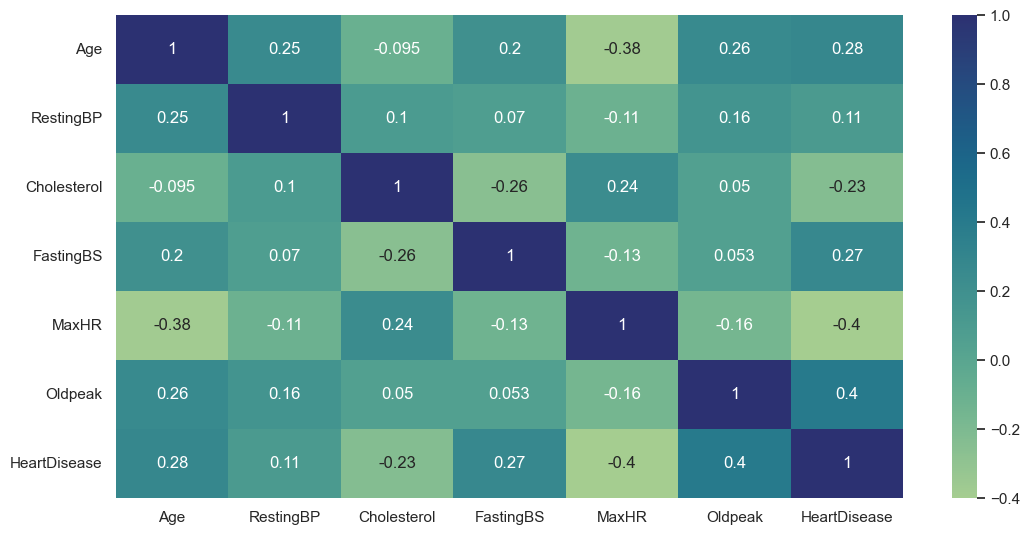

In [6]:

sns.set(rc={'figure.figsize':(12.7, 6.27)})
sns.heatmap(df.corr(), annot=True, cmap='crest')

In [7]:
df_.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,0,0,0,1


Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
Обучите дерево решений на обучающем множестве. Используйте следующие модели:
a) tree.DecisionTreeClassifier
b) ensemble.RandomForestClassifier

In [8]:
X = df_.drop(columns = ['HeartDisease'])
y = df_['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model_dtc = DecisionTreeClassifier(random_state=42)
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
y_pred = model_dtc.predict(X_test)


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        77
           1       0.87      0.80      0.83       107

    accuracy                           0.82       184
   macro avg       0.81      0.82      0.81       184
weighted avg       0.82      0.82      0.82       184



In [12]:
model_rfc = RandomForestClassifier(max_depth=2, random_state=42)
model_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [13]:
y_pred = model_rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        77
           1       0.87      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



In [35]:
feature_importances = pd.DataFrame()

feature_importances['feature_names'] = model_rfc.feature_names_in_
feature_importances['feature_importances'] = model_rfc.feature_importances_

feature_importances = feature_importances.sort_values(by='feature_importances')

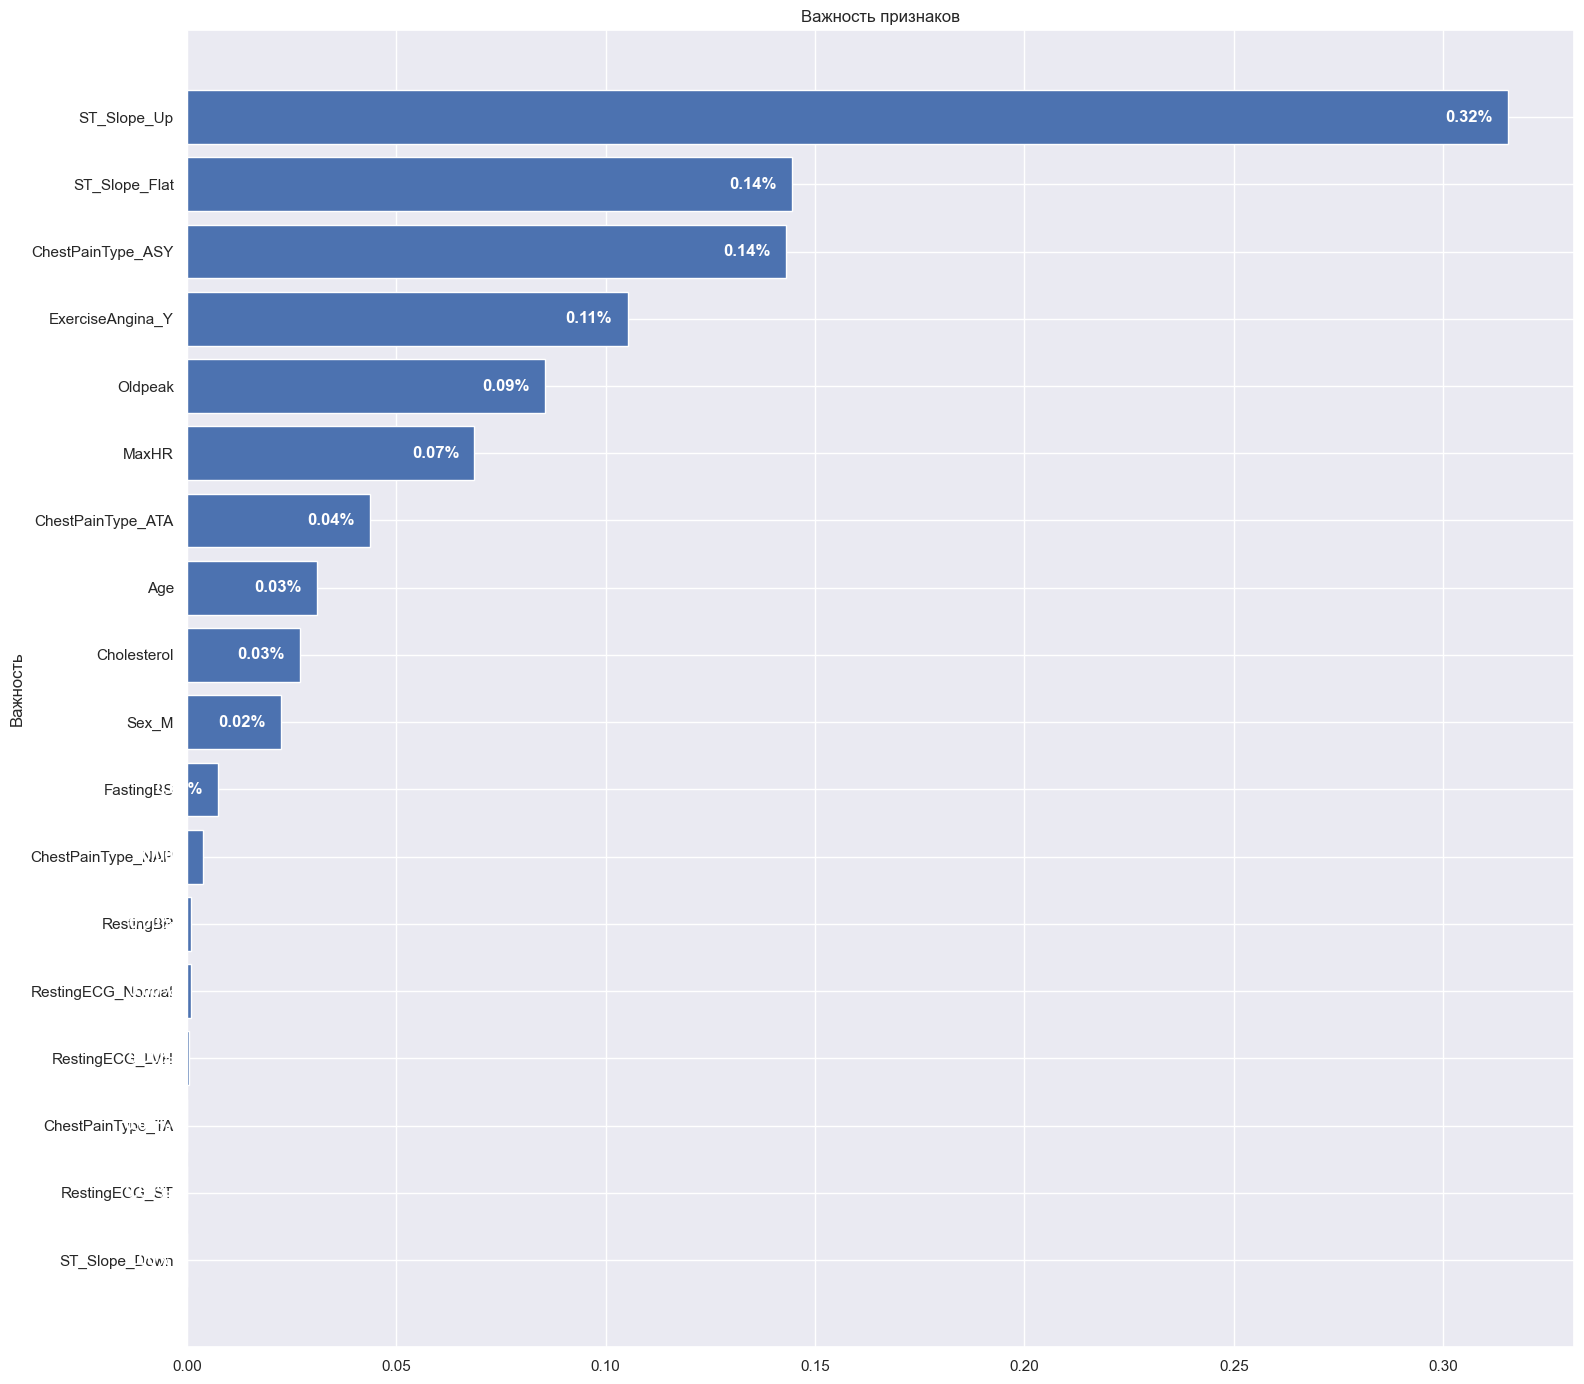

In [45]:
fig, ax = plt.subplots(figsize=(16,14))

bar_ = plt.barh(feature_importances['feature_names'], feature_importances['feature_importances'])
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
ax.bar_label(bar_, label_type='edge', padding = -45,  fmt='%.2f%%', color = 'white', fontweight='bold')
fig.tight_layout()

Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.
a) Повторите п. 5

In [14]:
bagging_dtc = BaggingRegressor(DecisionTreeClassifier(random_state=42),
                           n_estimators=10,
                           random_state=42)

bagging_dtc.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeClassifier(random_state=42),
                 random_state=42)

In [15]:
p_pred = bagging_dtc.predict(X_test)
p_pred = p_pred.flatten()

y_pred = np.where(p_pred > 0.5, 1, 0)

In [16]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.91      0.84        77
           1       0.93      0.82      0.87       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184



Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.
a) Повторите п. 5

In [19]:
estimators = [
        ('dtc', DecisionTreeClassifier(random_state=42)),
        ('rfc', RandomForestClassifier(max_depth=2, random_state=42)),
        ('svr', LinearSVC(random_state=41, tol=1e-05))]

In [20]:
stacking = StackingClassifier(
            estimators=estimators, final_estimator=LogisticRegression()
            )
stacking.fit(X_train, y_train)

C:\Users\Alexey\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Alexey\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Alexey\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Alexey\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Alexey\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Alexey\anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the n

StackingClassifier(estimators=[('dtc', DecisionTreeClassifier(random_state=42)),
                               ('rfc',
                                RandomForestClassifier(max_depth=2,
                                                       random_state=42)),
                               ('svr', LinearSVC(random_state=41, tol=1e-05))],
                   final_estimator=LogisticRegression())

In [21]:
y_pred =stacking.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84        77
           1       0.89      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

